<a href="https://colab.research.google.com/github/chunyuan0221/3rd-ML100days/blob/master/Day_085_EarlyStop_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [0]:
import os
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [0]:
train, test = keras.datasets.cifar10.load_data()

In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
def build_mlp(input_shape, output_neuron=10, layer_neuron=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(shape=input_shape)
    for i, neuron in enumerate(layer_neuron):
        if i == 0:
            x = keras.layers.BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=neuron, activation='relu', name='hidden_layer%s' %str(i+1))(x)
        else:
            x = keras.layers.BatchNormalization()(x)
            x = keras.layers.Dense(units=neuron, activation='relu', name='hidden_layer%s' %str(i+1))(x)
    out = keras.layers.Dense(units=output_neuron, activation='softmax')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [0]:
"""Code Here
設定超參數
"""
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
LEARNING_RATE = 1e-3

In [26]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_acc',
                          patience=10,
                          verbose=1)

"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(x_train.shape[1:])
opt = keras.optimizers.SGD(lr=LEARNING_RATE, momentum=MOMENTUM, nesterov=True)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_data=(x_test, y_test),
          shuffle=True,
          callbacks=[earlystop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.8321 - acc: 0.3587 - val_loss: 1.6238 - val_acc: 0.4242
Epoch 2/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.5143 - acc: 0.4660 - val_loss: 1.5331 - val_acc: 0.4610
Epoch 3/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.3943 - acc: 0.5113 - val_loss: 1.4722 - val_acc: 0.4790
Epoch 4/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.3057 - acc: 0.5439 - val_loss: 1.4344 - val_acc: 0.4874
Epoch 5/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.2288 - acc: 0.5737 - val_loss: 1.4139 - val_acc: 0.4950
Epoch 6/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.1610 - acc: 0.5984 - val_loss: 1.4003 - val_acc: 0.5057
Epoch 7/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.0969 - acc: 0.6218 - val_loss: 1.3958 - val_acc

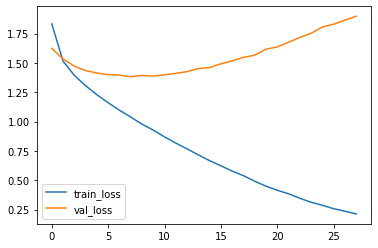

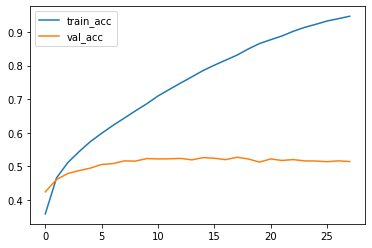

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
plt.plot(model.history.history['loss'], label='train_loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(model.history.history['acc'], label='train_acc')
plt.plot(model.history.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

### callback, patience=25


In [28]:
# 載入 Callbacks

from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_acc',
                          patience=25,
                          verbose=1)

model = build_mlp(x_train.shape[1:])
opt = keras.optimizers.SGD(lr=LEARNING_RATE, momentum=MOMENTUM, nesterov=True)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_data=(x_test, y_test),
          shuffle=True,
          callbacks=[earlystop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.8492 - acc: 0.3496 - val_loss: 1.6311 - val_acc: 0.4237
Epoch 2/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.5159 - acc: 0.4666 - val_loss: 1.5270 - val_acc: 0.4574
Epoch 3/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.3910 - acc: 0.5133 - val_loss: 1.4725 - val_acc: 0.4789
Epoch 4/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.3015 - acc: 0.5456 - val_loss: 1.4303 - val_acc: 0.4973
Epoch 5/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.2264 - acc: 0.5735 - val_loss: 1.4153 - val_acc: 0.5050
Epoch 6/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.1591 - acc: 0.5986 - val_loss: 1.3933 - val_acc: 0.5082
Epoch 7/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.0973 - acc: 0.6202 - val_loss: 1.3911 - val_acc

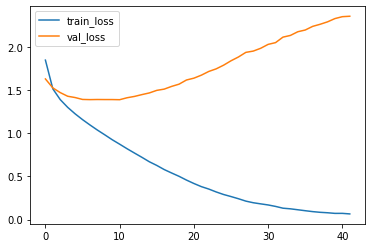

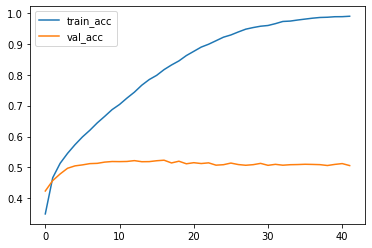

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
plt.plot(model.history.history['loss'], label='train_loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(model.history.history['acc'], label='train_acc')
plt.plot(model.history.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

### Result
***
- 將callback中的patience參數調高，會導致EarlyStop的時機更晚。
- patience:判斷要EarlyStop的等待次數(epochs)。若patience設定10次，模型的預測結果持續10個epoch沒有進步，則模型停止擬合。
- monitor:依據什麼作為EarlyStop。ex:train_loss、val_loss、train_acc或val_acc等等